In [5]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#reading the video
cap = cv2.VideoCapture('./images/vtest.mp4')
while True:
    ret, frame = cap.read()
    if ret == False:
        break
    current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = cv2.absdiff(current_frame, previous_frame)
    previous_frame = current_frame
    labels,stats, _,_ = cv2.connectedComponentsWithStats(diff)
    
    cv2.imshow('frame', current_frame)
    cv2.imshow('objects:', diff)
    print(f'Objects are : {labels-1}')
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    previous_frame = current_frame
cap.release()
cv2.destroyAllWindows()

Objects are : 17
Objects are : 359
Objects are : 222
Objects are : 286
Objects are : 218
Objects are : 266
Objects are : 319
Objects are : 395
Objects are : 274
Objects are : 227
Objects are : 268
Objects are : 419
Objects are : 757
Objects are : 393
Objects are : 242
Objects are : 178
Objects are : 187
Objects are : 480
Objects are : 182
Objects are : 202
Objects are : 183
Objects are : 92
Objects are : 82
Objects are : 710
Objects are : 643
Objects are : 293
Objects are : 277
Objects are : 312
Objects are : 427
Objects are : 846
Objects are : 339
Objects are : 336
Objects are : 1103
Objects are : 346
Objects are : 381
Objects are : 786
Objects are : 943
Objects are : 523
Objects are : 455
Objects are : 684
Objects are : 782
Objects are : 393
Objects are : 375
Objects are : 338
Objects are : 241
Objects are : 460
Objects are : 295
Objects are : 295
Objects are : 217
Objects are : 758
Objects are : 599
Objects are : 512
Objects are : 645
Objects are : 370
Objects are : 1219
Objects are

In [15]:

from sklearn.cluster import KMeans

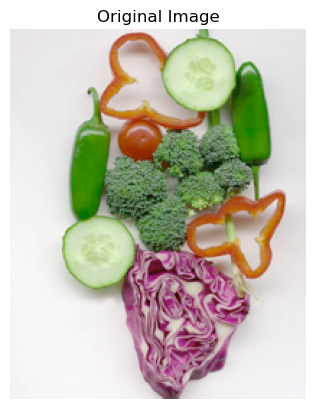

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


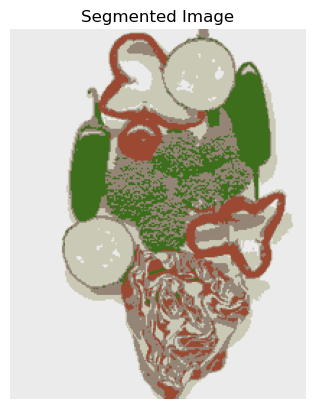

In [16]:
image = cv2.imread('./images/clustringImage.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, 'gray')
plt.axis('off'); plt.title('Original Image')
plt.show()

#reshaping the image
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

#implementing kmeans
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixel_values)
colors = kmeans.cluster_centers_
labels = kmeans.labels_
colors = np.uint8(colors)
segmented_image = colors[labels]

#reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image); plt.axis('off'); plt.title('Segmented Image')
plt.show()


In [17]:
import cv2 as cv
def graphCutSeg(): 
    imagePath = './images/tesla.jpg'
    img = cv.imread(imagePath)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    
    plt.figure() 
    plt.subplot(231)
    plt.imshow(img, 'gray'); plt.axis('off'); plt.title('Original Image')

    plt.subplot(232)
    rows,cols,_ = img.shape
    mask = np.zeros((rows,cols),np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    x0 = 360
    y0 = 1470
    x1 = 2800
    y1 = 3700
    rect = (x0,y0,x1-x0,y1-y0)
    iter = 1 
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,iter,cv.GC_INIT_WITH_RECT)
    plt.imshow(mask, 'gray'); plt.axis('off'); plt.title('Mask')

    plt.subplot(233)
    # if mask is 0 or 2, turn into 0, otherwise turn into 1 
    maskGC = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    imgSeg = img*maskGC[:,:,np.newaxis]
    plt.imshow(imgSeg); plt.axis('off'); plt.title('Segmented Image')

    # Fix missing spot 
    plt.subplot(234)
    maskPath = './tesla_graphcut.jpg'
    markedMask = cv.imread(maskPath,cv.IMREAD_GRAYSCALE)
    mask[markedMask==255] = 1
    iter = 1
    cv.grabCut(img,mask,None,bgdModel,fgdModel,iter,cv.GC_INIT_WITH_MASK)
    plt.imshow(mask, 'gray'); plt.axis('off'); plt.title('Mask')
    
    plt.subplot(235)
    maskGC = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    imgSeg = img*maskGC[:,:,np.newaxis]
    plt.imshow(imgSeg, 'gray'); plt.axis('off'); plt.title('Segmented Image')
    plt.show() 

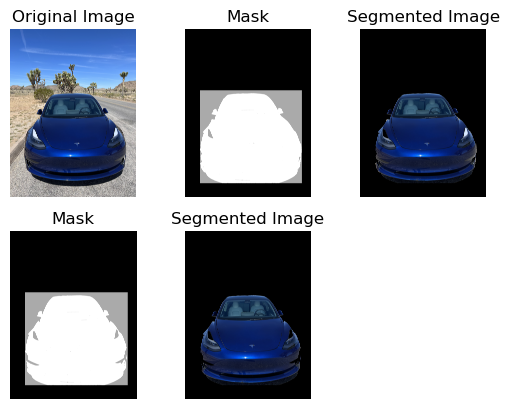

In [18]:
graphCutSeg()